#### Firstly we should load the libraries that we'll use.

In [2]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio
from skimage import data

#### Then we create a numpy array from an image file.
Meaning that RGB (Red-Green-Blue) values (from 0 to 255) will be filled in a 3D array.
* First dimension is for rows.
* Second dimension is for columns.
* Third dimension is for RGB type.

In [3]:
photo_ndarray = imageio.imread('samplephoto.jpg')
# We're using imageio library to extract RGB values.

# Let's see the type of photo_nd_array.
type(photo_ndarray)

imageio.core.util.Array

#### Let's use matplotlib to see the photo stored in the "photo_nd_array" variable.

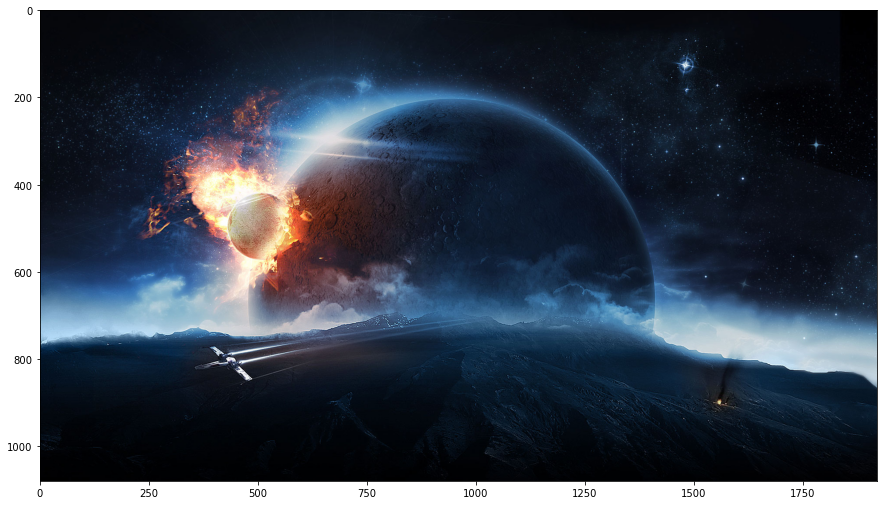

In [4]:
plt.figure(figsize=(15,15))
plt.imshow(photo_ndarray)

In [5]:
photo_ndarray.shape

(1080, 1920, 3)

If we need to explain the numbers we see in the output above,
the number 1080 corresponds to the height of the photo and 1920 corresponds to the length of the photo.
The interesting part is the number 3. This number corresponds to red, green and blue. 0 means red, 1 means green and 2 means blue

So if we want to reach a certain pixel and manipulate its blue level we should write like below.

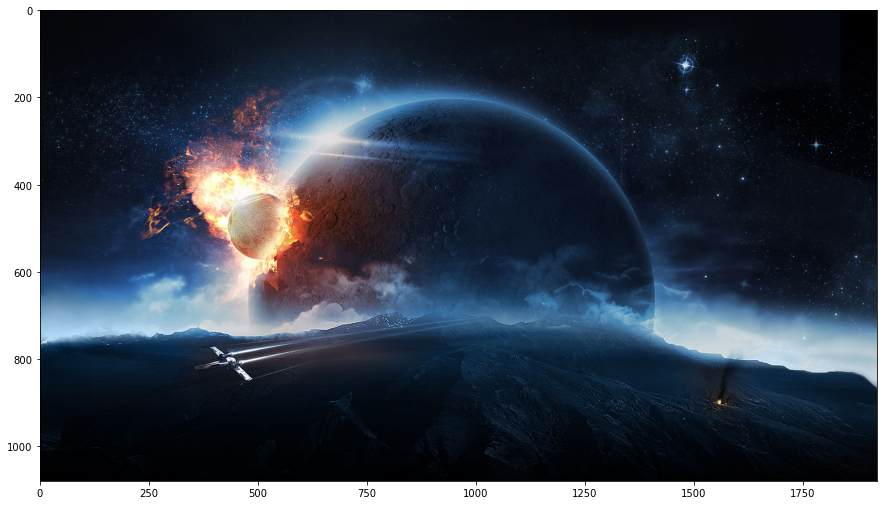

In [6]:
photo_ndarray[100, 200, 2] = 0
# We set the blue value of the pixel in the (100,200) coordinate to 0.
# But since this is something that cannot be seen with the naked eye, we cannot observe it.
plt.figure(figsize=(15,15))
plt.imshow(photo_ndarray)

Since we cannot detect the change in a single pixel, let's make changes in a region we have determined.

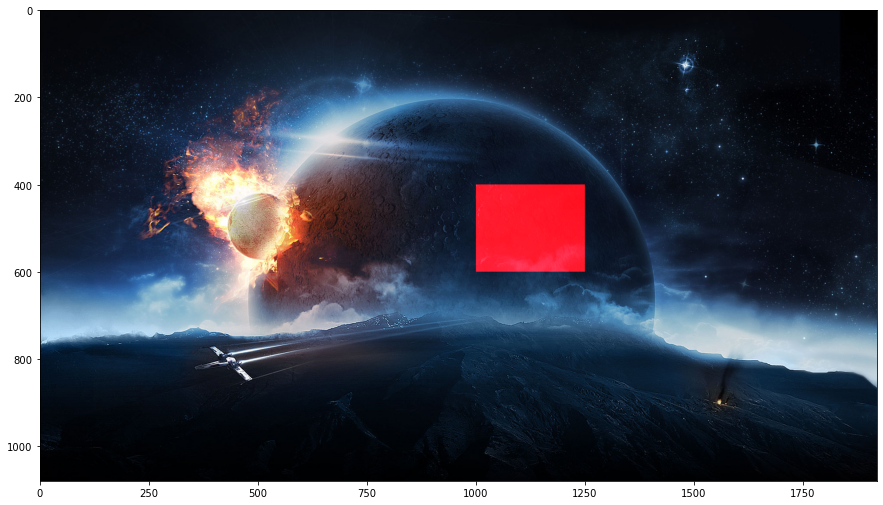

In [7]:
photo_ndarray[400:600, 1000:1250, 0] = 255
# With this code, we set the redness value between 400. and 600. row and 1000. and 1250. column to 255.
plt.figure(figsize=(15,15))
plt.imshow(photo_ndarray)

In [8]:
photo_ndarray = imageio.imread('samplephoto.jpg')
# We loaded it from the beginning to get rid of the changes made

Let's say we want to make the values of all pixels with RGB values less than 100 to 255. To do this, we first need to create a filter array that specifies which pixels are smaller than 100 and which are larger. And after that, we can use numpy's ability to use arrays as index (if you do not know this feature, you can learn from this page https://www.geeksforgeeks.org/numpy-indexing/).

In [11]:
filter_ndarray_for_values_smaller_than_100 = photo_ndarray < 100
# Let's print this variable to see what it is
print(filter_ndarray_for_values_smaller_than_100)
# When we print this way, we can think that all values are true because we can only see the beginning and the end,
# so let's print it like this on the next line.
print("--------------------------------")
print(filter_ndarray_for_values_smaller_than_100[700:750, 0:100, :])

[[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 ...

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]]
--------------------------------
[[[ True False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [Fa

As we can see, pixels with an RGB value of less than 100 become true, while the rest become false.

Now, using this "filter_ndarray_for_values_smaller_than_100" as index, we can modify the pixels with RGB value less than 100 as we want.

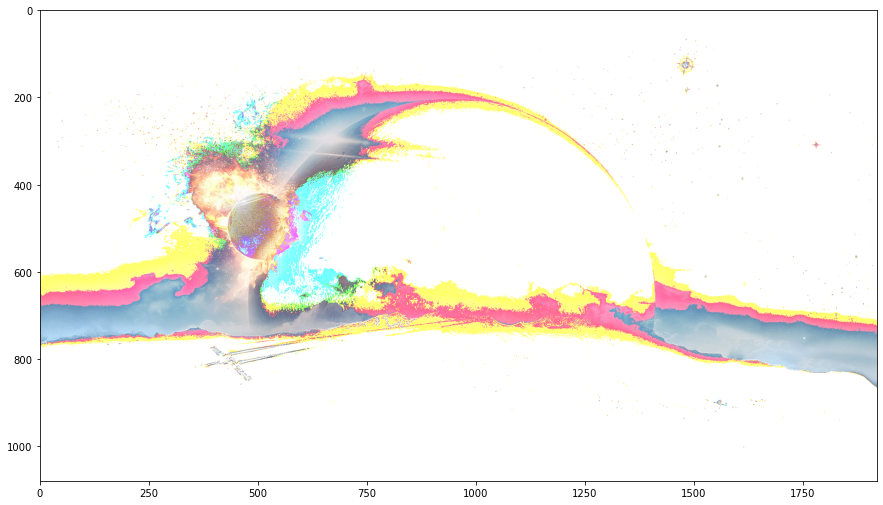

In [12]:
photo_ndarray[filter_ndarray_for_values_smaller_than_100] = 255
plt.figure(figsize=(15,15))
plt.imshow(photo_ndarray)

#### Let's create a disc filter in the center of the picture.

For this we need to create a filter array again and this filter array should have a value of false for all the pixels inside the disk, while it should have a value of true for the rest.

In order to create such a filter array, we need to create an array containing the distance of all pixels from the center point.

And for this we need to find the center point first.

In [14]:
total_rows, total_columns, total_layers = photo_ndarray.shape
center_row, center_column = total_rows / 2, total_columns /2
# We obtained the coordinates of the center point
print("Center row: ", center_row)
print("Center column: ", center_column)

Center row:  540.0
Center column:  960.0


Before finding the array containing the distance of all pixels to the center, we must create an ***x*** array containing all row values and a ***y*** array containing all column values so that we can calculate the distances of all points to the center using these arrays and the coordinates of the center point with the famous equation **r^2 = x^2 + y^2**.

In [18]:
x, y = np.ogrid[:total_rows, :total_columns]
distance_from_center_ndarray = np.sqrt(np.power(x - center_row, 2) + np.power(y - center_column, 2))
# Now we have an array with the distance of all points to the center.

Now we need to define a radius, I select the short edge(row), so that the size of the disk does not exceed the photo's boundaries, and I set the radius as half of the row. After determining our radius, we can now access the required filter array.

In [19]:
radius = total_rows / 2
disk_filter_ndarray = distance_from_center_ndarray > radius

Eventually we got to our filter array, and now we can use this array to darken the outside of the disk and make it black.

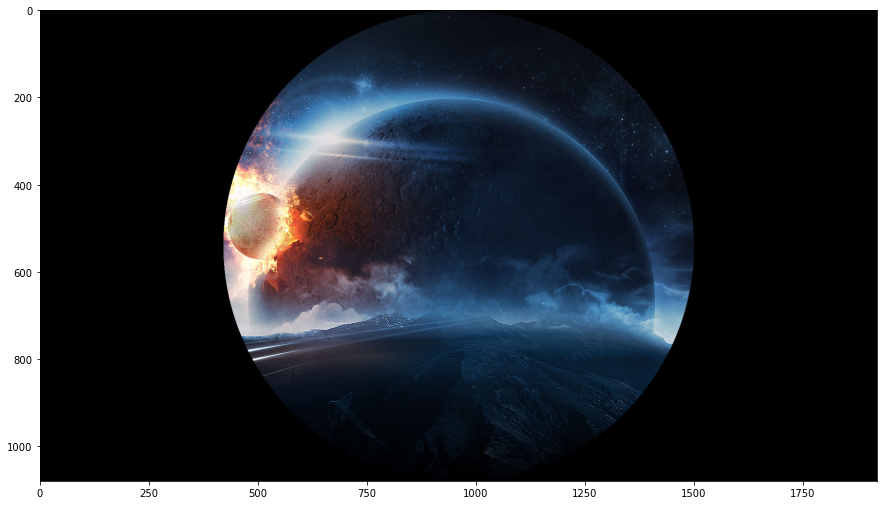

In [21]:
photo_ndarray = imageio.imread('samplephoto.jpg')
photo_ndarray[disk_filter_ndarray] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_ndarray)